In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from IPython.display import display, HTML
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter

# Data sudah dibuat sebelumnya
data = {
    'No': range(1, 11),
    'Kenaikan derajat keasaman (V1)': [3, 4, 4, 5, 5, 6, 7, 8, 7, 9],
    'Penyusutan volume (V2)': [2, 1, 3, 1, 4, 5, 6, 4, 2, 1],
    'Kategori': ['Baik', 'Baik', 'Baik', 'Baik', 'Baik', 'Buruk', 'Buruk', 'Buruk', 'Buruk', 'Buruk']
}
df = pd.DataFrame(data)

# Fungsi untuk menerapkan styling pada DataFrame
def colorize(val):
    color = 'green' if val == 'Baik' else 'red' if val == 'Buruk' else 'black'
    return f'color: {color}'

styled_df = df.style.applymap(colorize, subset=['Kategori']).hide(axis='index')
display(styled_df)

C:\Users\ADVAN\AppData\Local\Temp\ipykernel_13360\2900057490.py:26: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(colorize, subset=['Kategori']).hide(axis='index')


No,Kenaikan derajat keasaman (V1),Penyusutan volume (V2),Kategori
1,3,2,Baik
2,4,1,Baik
3,4,3,Baik
4,5,1,Baik
5,5,4,Baik
6,6,5,Buruk
7,7,6,Buruk
8,8,4,Buruk
9,7,2,Buruk
10,9,1,Buruk


In [32]:
# Memisahkan fitur dan label
X = df[['Kenaikan derajat keasaman (V1)', 'Penyusutan volume (V2)']]
y = df['Kategori']
df.head()




,No,Kenaikan derajat keasaman (V1),Penyusutan volume (V2),Kategori
0,1,3,2,Baik
1,2,4,1,Baik
2,3,4,3,Baik
3,4,5,1,Baik
4,5,5,4,Baik


In [33]:
df.rename(columns={'Kategori':'Class'}, inplace=True)
df.head()

,No,Kenaikan derajat keasaman (V1),Penyusutan volume (V2),Class
0,1,3,2,Baik
1,2,4,1,Baik
2,3,4,3,Baik
3,4,5,1,Baik
4,5,5,4,Baik


In [43]:
# Convert 'Class' values
konversi_dataset = {"Class": {'Baik': 'Liver', 'Buruk': 'No_Liver'}}
df = df.replace(konversi_dataset)
df.head()

,No,Kenaikan derajat keasaman (V1),Penyusutan volume (V2),Class
0,1,3,2,Liver
1,2,4,1,Liver
2,3,4,3,Liver
3,4,5,1,Liver
4,5,5,4,Liver


In [46]:
df['Class'].value_counts()

Class
Liver       5
No_Liver    5
Name: count, dtype: int64

In [50]:
from imblearn.combine import SMOTEENN
# Hapus duplikat
df.drop_duplicates(inplace=True)


# Pastikan x dan y diinisialisasi ulang setelah modifikasi df
x = df[['Kenaikan derajat keasaman (V1)', 'Penyusutan volume (V2)']]
y = df[['Class']]

# Inisialisasi SMOTEENN dan lakukan resampling
SE = SMOTEENN()
x_se, y_se = SE.fit_resample(x, y)

# Tampilkan jumlah data sebelum dan sesudah resampling
print('Data Sebelum dilakukan Hybrid Sampling SMOTE-ENN \n', y['Class'].value_counts().rename('Class'))
print('Hasil Hybrid Sampling SMOTE-ENN pada DAtaset \n', y_se['Class'].value_counts().rename('Class'))

Data Sebelum dilakukan Hybrid Sampling SMOTE-ENN 
 Class
Liver       5
No_Liver    5
Name: Class, dtype: int64
Hasil Hybrid Sampling SMOTE-ENN pada DAtaset 
 Class
Liver       4
No_Liver    1
Name: Class, dtype: int64


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

,No,Kenaikan derajat keasaman (V1),Penyusutan volume (V2),Class
0,1,3,2,Liver
1,2,4,1,Liver
2,3,4,3,Liver
3,4,5,1,Liver
4,5,5,4,Liver


In [52]:
#Fitting Metode C4.5
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [53]:
y_pred = dt.predict(x_test)
print(y_pred)


['Liver' 'No_Liver']


Pengujian Performa Metode C4.5 dengan Confusion matrix
Akurasi C4.5 : 1.0
                     ABDUL RAHMAN                      
                    2110031806044                   
              precision    recall  f1-score   support

       Liver       1.00      1.00      1.00         1
    No_Liver       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



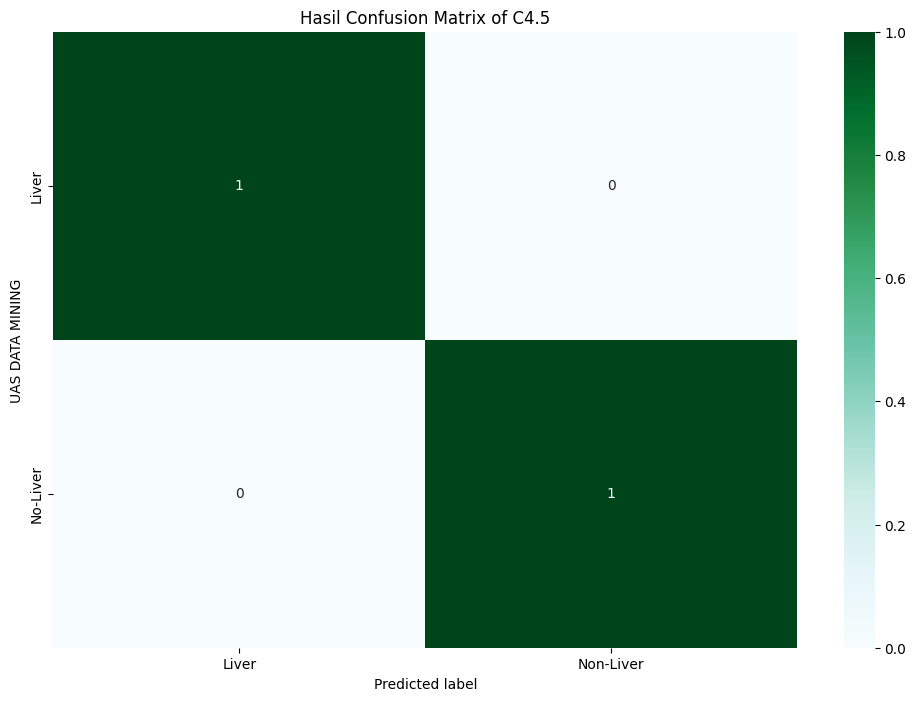

In [67]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report


# Pengujian Performa Metode Naive Bayes dengan Confusion Matrix
print("Pengujian Performa Metode C4.5 dengan Confusion matrix")
cm_DT = confusion_matrix(y_test, y_pred)

# Membuat figure dan axes dengan ukuran tertentu
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cm_DT, annot=True, fmt='g', cmap='BuGn', ax=ax)

# Label judul dan ticks
ax.set_xlabel('Predicted label')
ax.set_ylabel('UAS DATA MINING')
ax.set_title('Hasil Confusion Matrix of C4.5')
ax.xaxis.set_ticklabels(['Liver', 'Non-Liver'])
ax.yaxis.set_ticklabels(['Liver', 'No-Liver'])

# Tampilkan hasil C4.5
print("=" * 55)
print("\033[92mAkurasi C4.5 :", metrics.accuracy_score(y_test, y_pred))
print("=\033[97m" * 55)


print("\033[31mABDUL RAHMAN".center(60, ' ') + "\033[33m")
print("\033[97m2110031806044".center(57, ' ') + "\033[33m")

# Calculate precision, recall, f1-score, and support for DecisionTreeClassifier
print("=======================================================")
print(classification_report(y_test, y_pred))